In [1]:
import pandas as pd
import numpy as np

# Question 2

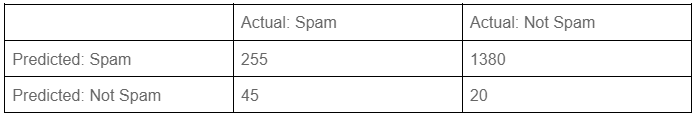

In [2]:
TP = 255
TN = 20
FP = 1380
FN = 45

precision = (TP)/(TP + FP)
recall = (TP)/(TP + FN)
F1_score = (2*precision*recall) / (precision + recall)
F1_score

0.2635658914728682

In [3]:
df = pd.read_csv("Data_for_UCI_named.csv")

In [4]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


Because of the direct relationship between 'stab' and 'stabf' ('stabf' = 'stable' if 'stab' <= 0, 'unstable' otherwise), 'stab' should be dropped and 'stabf' will remain as the sole dependent variable (binary classification)

In [5]:
df = df.drop('stab', axis=1)
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [6]:
df.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stabf    0
dtype: int64

In [7]:
# Replacing stable and unstable in stabf column by 0 and 1 respectively
df['stabf'] = df['stabf'].replace({'unstable': 1, 'stable': 0})
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,1
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,0
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,1
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,1
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,1


Split the data into an 80-20 train-test split with a random state of “1”. Use the standard scaler to transform the train set (x_train, y_train) and the test set (x_test). Use scikit learn to train a random forest and extra trees classifier. And use xgboost and lightgbm to train an extreme boosting model and a light gradient boosting model. Use random_state = 1 for training all models and evaluate on the test set.

In [8]:
X = df.drop('stabf', axis=1)
y = df['stabf']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2 , random_state= 1 )

In [10]:
from sklearn.preprocessing import StandardScaler

# Scaling the training and testing data for the independent variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[ 0.36732671, -0.98604156,  0.65044706, ...,  0.33985949,
         0.58556788,  0.49223946],
       [-0.06465869,  0.08943734,  1.03507899, ..., -1.5584875 ,
         1.42964862, -1.44352101],
       [-1.46785   ,  1.29841758, -0.50253617, ...,  1.45153362,
        -1.04574277,  0.49248925],
       ...,
       [ 0.65760851, -0.72275633, -1.4058879 , ...,  0.29310048,
        -1.55058661,  0.81034412],
       [-0.05931596, -1.26053241, -1.01047147, ..., -0.38825455,
        -0.72678059,  1.66791568],
       [-1.47321368,  0.63843757,  0.25012249, ..., -1.17410957,
         1.179282  ,  0.78362657]])

In [11]:
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled

array([[ 0.59216281, -0.42056489,  1.47247233, ...,  1.17528683,
        -1.49264423,  1.08629139],
       [ 0.19918339,  0.36454311, -0.19007599, ..., -0.39594869,
         1.41270302,  1.2275355 ],
       [-1.08603505, -0.32183365, -0.87350524, ..., -1.44437004,
         0.65421559, -1.67979856],
       ...,
       [ 0.94713772, -1.66831304, -1.62907667, ...,  0.12889933,
         0.57628587,  1.32084757],
       [-1.12735376,  0.18457336, -0.23820702, ...,  0.80017191,
        -1.3484627 , -0.79985771],
       [-1.38555998,  1.49904306,  0.27297057, ..., -0.92058109,
         0.00903865,  1.19055888]])

# Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Random forest classifier
rfc = RandomForestClassifier(random_state=1)

# model fitting
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=1)

In [13]:
# Model prediction
y_pred_rf = rfc.predict(X_test_scaled)

# Model accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier accuracy "+  str(round(rf_accuracy, 4)))

Random Forest Classifier accuracy 0.928


# XGBoost

In [14]:
from xgboost import XGBClassifier

# XGBoostClassifier
xgb = XGBClassifier(random_state=1)

# model fitting
xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [15]:
# Model prediction
y_pred_xgb = xgb.predict(X_test_scaled)

# Model accuracy
xg_accuracy = accuracy_score(y_test, y_pred_xgb)
print("XGB classifier accuracy "+  str(round(xg_accuracy, 4)))

XGB classifier accuracy 0.946


# LGBM

In [16]:
import lightgbm as lgb

# LGBMClassifier
lgbm = lgb.LGBMClassifier(random_state=1)

# Model fitting
lgbm.fit(X_train_scaled, y_train)


LGBMClassifier(random_state=1)

In [17]:
# Model prediction
y_pred_lgbm = lgbm.predict(X_test_scaled)

# Model accuracy
lgbm_accuracy = accuracy_score(y_test, y_pred_lgbm)

print("LGBM classifier accuracy "+  str(round(lgbm_accuracy, 4)))

LGBM classifier accuracy 0.9365


#  ExtraTrees 

In [18]:
from sklearn.ensemble import ExtraTreesClassifier

# ExtraTreesClassifier
etc = ExtraTreesClassifier(random_state=1)

# Model fitting
etc.fit(X_train_scaled, y_train)

ExtraTreesClassifier(random_state=1)

In [19]:
# Model prediction
y_pred_etc = etc.predict(X_test_scaled)

# Model accuracy
etc_accuracy = accuracy_score(y_test, y_pred_etc)
print("ExtraTrees classifier accuracy "+  str(round(etc_accuracy, 4)))

ExtraTrees classifier accuracy 0.926


In [20]:
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 5, 7]
min_samples_leaf = [4, 6, 8]
max_features = ['auto', 'log2', None] 
hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [21]:
from sklearn.model_selection import RandomizedSearchCV

rs = RandomizedSearchCV(estimator=etc, param_distributions=hyperparameter_grid, 
                        cv=5, n_iter=10, scoring="accuracy", n_jobs=-1, 
                        verbose=1, random_state=1)
search = rs.fit(X_train_scaled, y_train) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [22]:
print(rs.best_params_)

{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None}


In [26]:
# Selecting the closest option 
etc_2 = ExtraTreesClassifier(n_estimators= 1000, min_samples_split=2, 
                             min_samples_leaf=8, max_features=None, 
                             random_state=1)
etc_2.fit(X_train_scaled, y_train)
etc2_pred = etc_2.predict(X_test_scaled)

In [27]:
etc_accuracy2 = accuracy_score(y_test, etc2_pred)
etc_accuracy2

0.9285